In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from scipy.interpolate import griddata
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

/var/folders/jj/ts6g_z9n3m32pyywq5707bcc0000gn/T/ipykernel_2850/1794645751.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset=pd.read_csv('/Users/jiaqili/Downloads/hosing.csv')

In [3]:
#number of row and col
dataset.shape

(13770, 18)

In [4]:
#first 5 row
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [5]:
#check missing value
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#statistical measure of the dataset
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,1.377000e+04,13770.000000,13770.000000,13770.000000,1.377000e+04,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000,13770.000000
mean,5.322887e+05,3.361293,2.059423,2050.309368,1.600192e+04,1.432280,0.007335,0.238417,3.446986,7.594771,1747.555338,302.754031,1967.370879,89.857952,47.560068,-122.214446,1974.069426,13470.976616
std,3.681187e+05,0.909100,0.759652,906.598589,4.360822e+04,0.511762,0.085332,0.770690,0.667116,1.165037,806.760244,450.681889,27.915140,413.860118,0.139905,0.139372,674.510415,28189.850454
min,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,47.155900,-122.515000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.440000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,47.464800,-122.327000,1490.000000,5425.000000
50%,4.470000e+05,3.000000,2.000000,1890.000000,7.901000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,47.573400,-122.230000,1830.000000,7820.000000
75%,6.350000e+05,4.000000,2.500000,2493.750000,1.109600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,47.679275,-122.126000,2330.000000,10319.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6110.000000,871200.000000


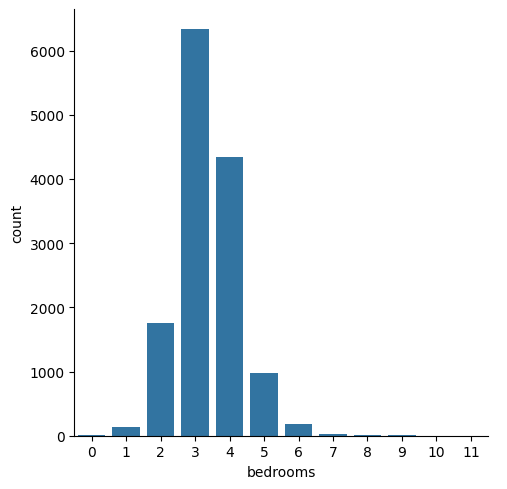

In [7]:
#number of values for bedroom
sns.catplot(x='bedrooms',data=dataset,kind='count')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

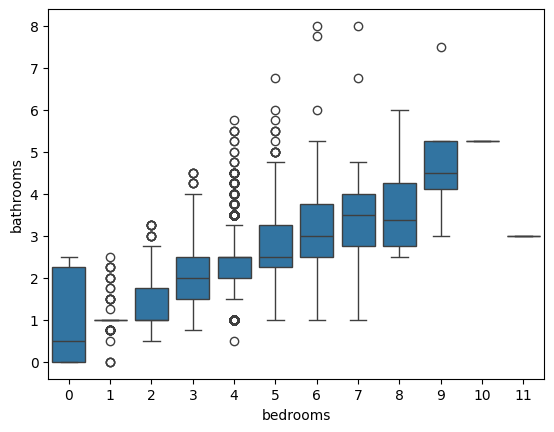

In [56]:
sns.boxplot(x='bedrooms', y='bathrooms', data=dataset)

<Axes: xlabel='bedrooms', ylabel='price'>

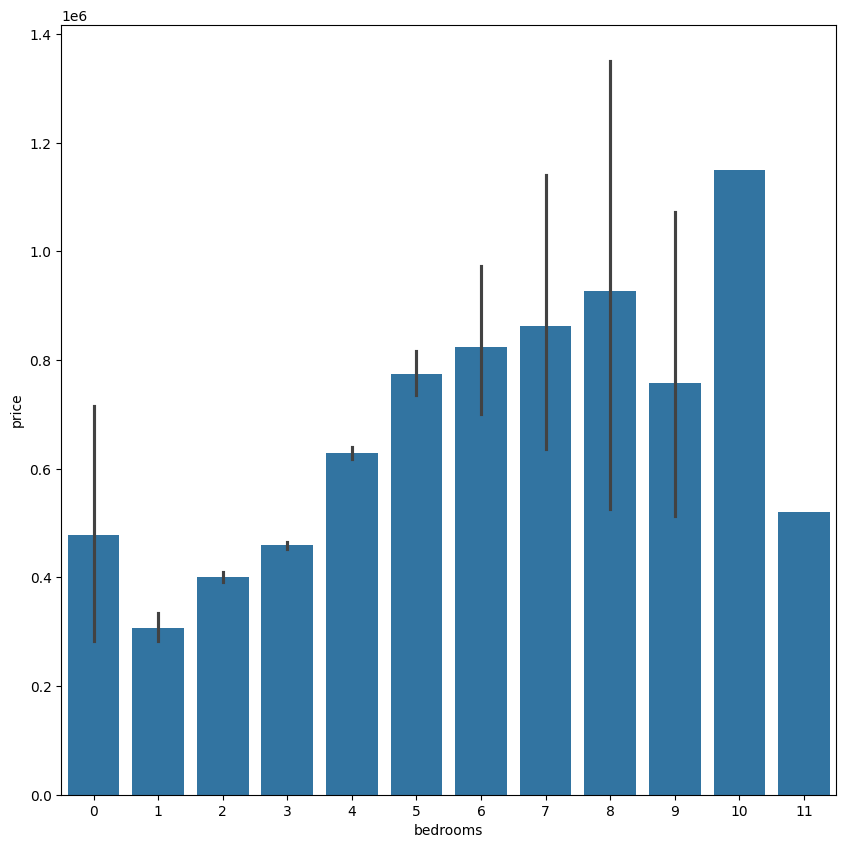

In [8]:
#price vs bedroom
plot=plt.figure(figsize=(10,10))
sns.barplot(x='bedrooms',y='price',data=dataset)

<Axes: xlabel='bathrooms', ylabel='price'>

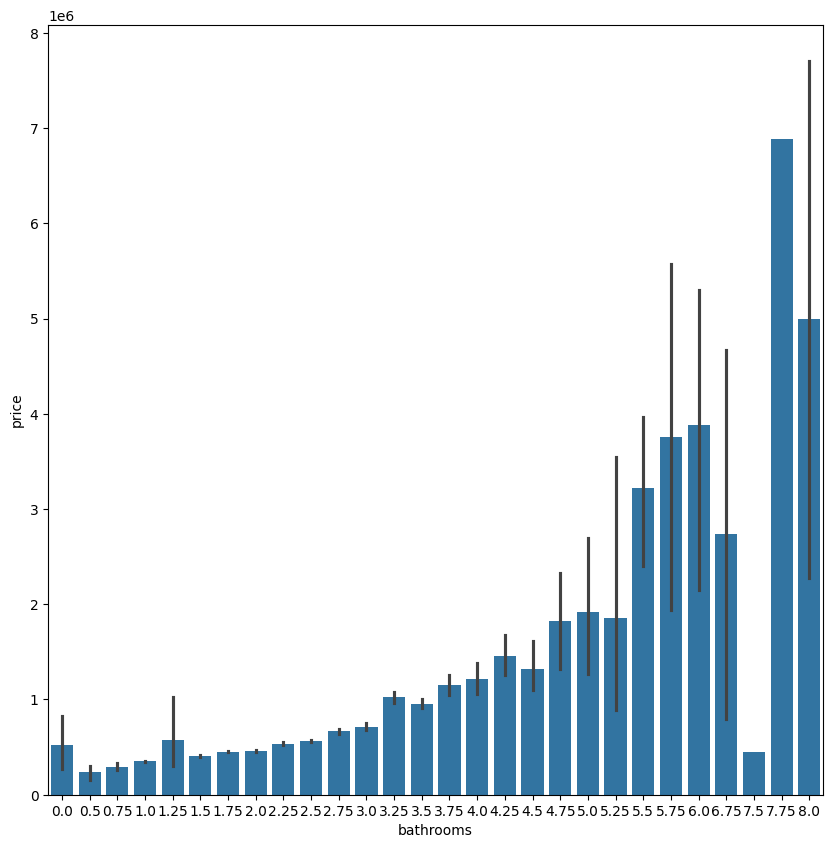

In [9]:
#price vs bathroom
plot=plt.figure(figsize=(10,10))
sns.barplot(x='bathrooms',y='price',data=dataset)

In [10]:
correlation=dataset.corr()

<Axes: >

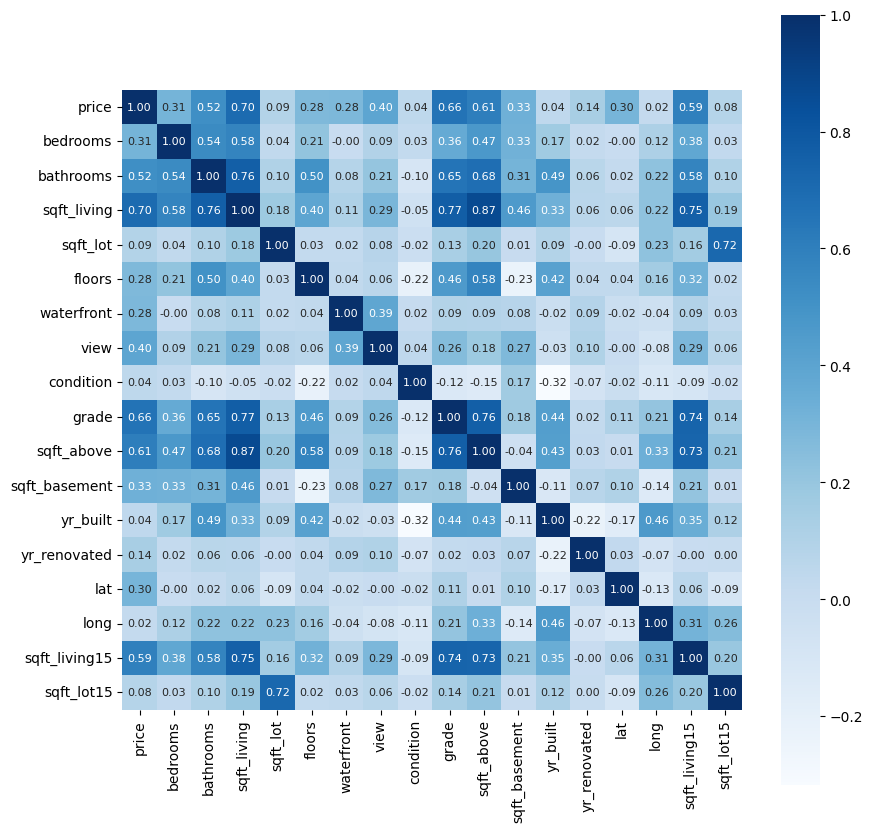

In [11]:
#constructing a headmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
X=dataset.drop('price',axis=1)
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             2       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
13765         2       1.00          710      5120     1.0           0     0   
13766         3       1.00          980      7228     1.5           0     0   
13767         3       1.00         1100      5400     1.5           0     0   
13768         5       2.50         2840      6010     2.0           0     0   
13769         4       2.25         2300      7524     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [13]:
Y=dataset['price']
print(Y)

0        231300.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
13765    216000.0
13766    340000.0
13767    505000.0
13768    372000.0
13769    263850.0
Name: price, Length: 13770, dtype: float64


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
Y_train.shape

(11016,)

In [16]:
Y_test.shape

(2754,)

In [17]:
Y.shape

(13770,)

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [21]:
print('accuracy:', test_data_accuracy)

accuracy: 0.011982570806100218


In [48]:
input_data=( 4, 3, 1960, 5000, 1, 0, 0, 5, 7, 1050, 910, 1965, 0, 47.5208, -122.393, 1360, 5000)
input_data=np.asarray(input_data)
input_data_reshaped=input_data.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[604000.]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
